# Tutorial: Simple Linear Regression in Action

Selamat datang di implementasi praktis pertama kita! Di notebook ini, kita akan membangun model *machine learning* dari awal hingga akhir. Kita akan menggunakan **Simple Linear Regression**, yang berarti kita akan memprediksi sebuah target numerik (`y`) hanya dengan menggunakan **satu fitur** input (`X`).

**Tujuan:**
1.  Mempersiapkan data untuk model.
2.  Melatih model `LinearRegression` dari Scikit-learn.
3.  Mengakses dan menginterpretasikan parameter yang dipelajari model (`intercept` dan `coefficient`).
4.  Membuat prediksi dan memvisualisasikan hasilnya.

### 1. Setup dan Persiapan Data

Pertama, kita impor semua library yang kita butuhkan. Untuk studi kasus ini, kita akan menggunakan dataset klasik "Gaji vs. Pengalaman" untuk melihat bagaimana pengalaman kerja memengaruhi gaji.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
# dataframe
data = {
    'TahunPengalaman': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0],
    'Gaji': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940]
}
df = pd.DataFrame(data)
print(df)

    TahunPengalaman   Gaji
0               1.1  39343
1               1.3  46205
2               1.5  37731
3               2.0  43525
4               2.2  39891
5               2.9  56642
6               3.0  60150
7               3.2  54445
8               3.2  64445
9               3.7  57189
10              3.9  63218
11              4.0  55794
12              4.0  56957
13              4.1  57081
14              4.5  61111
15              4.9  67938
16              5.1  66029
17              5.3  83088
18              5.9  81363
19              6.0  93940


### 2. Eksplorasi Data Visual

Sebelum membangun model, **selalu** visualisasikan data Anda. Untuk simple linear regression, kita ingin melihat apakah ada hubungan linear antara fitur dan target. `scatterplot` adalah alat yang sempurna untuk ini.

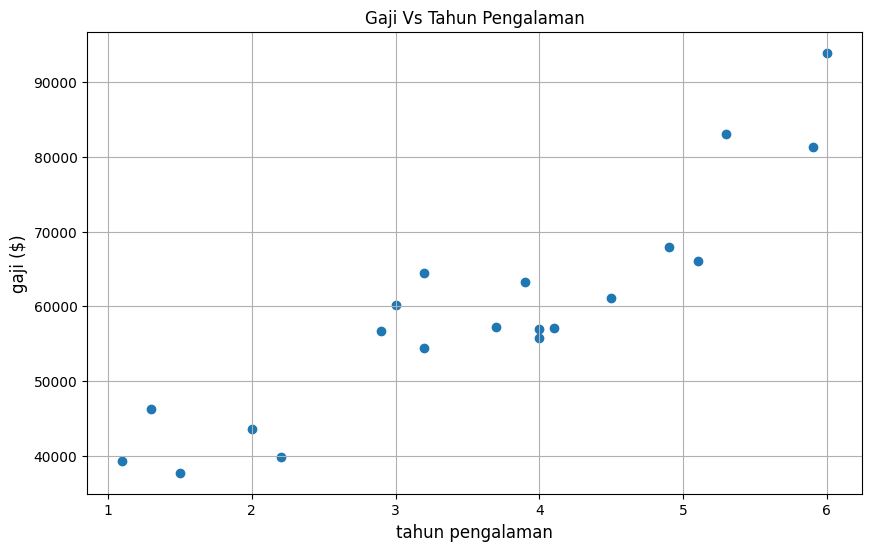

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df['TahunPengalaman'],df['Gaji'])
plt.title('Gaji Vs Tahun Pengalaman', fontsize=12)
plt.xlabel('tahun pengalaman', fontsize=12)
plt.ylabel('gaji ($)', fontsize=12)
plt.grid(True)
plt.show()

Terlihat jelas ada hubungan linear positif yang kuat. Semakin lama pengalaman, semakin tinggi gajinya. Ini adalah kandidat yang sempurna untuk Simple Linear Regression.

### 3. Persiapan Data untuk Scikit-learn

Kita perlu memisahkan data kita menjadi:
* **`X` (Fitur):** Input yang kita gunakan untuk membuat prediksi. Dalam kasus ini, `TahunPengalaman`.
* **`y` (Target):** Output yang ingin kita prediksi. Dalam kasus ini, `Gaji`.

**Penting:** Scikit-learn mengharapkan `X` sebagai array 2D (atau DataFrame), bahkan jika hanya ada satu fitur. Jadi, kita perlu mengubah bentuk `X` dari array 1D menjadi 2D.


In [37]:
# 1. pisahkan X dan Y
X = df[['TahunPengalaman']]
Y = df['Gaji']

# verifikasi bentuk data
print(f'bentuk X: {X.shape}')
print(f'bentuk Y: {Y.shape}')

bentuk X: (20, 1)
bentuk Y: (20,)


### 4. Train-Test Split

Sekarang kita bagi data kita menjadi set pelatihan dan set pengujian untuk evaluasi yang adil.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(f'jumlah data latih {X_train.shape}')
print(f'jumlah data test {X_test.shape}')

jumlah data latih (16, 1)
jumlah data test (4, 1)


### 5. Pelatihan Model Regresi Linear

Inilah intinya. Kita akan menginisiasi model `LinearRegression` dan melatihnya menggunakan data pelatihan kita.

In [39]:
model = LinearRegression()

# latih model
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 6. Inspeksi dan Interpretasi Model

Model kita telah "belajar" dan menemukan garis lurus terbaik yang cocok dengan data. Garis ini didefinisikan oleh dua parameter:
* **Intercept (`β₀`):** Titik di mana garis memotong sumbu Y (nilai `y` ketika `X=0`).
* **Coefficient (`β₁`):** Kemiringan (*slope*) dari garis.

Mari kita lihat apa yang telah dipelajari model kita.

In [44]:
# mengakses intercepct dan koefisien
intercept = model.intercept_
coefficient = model.coef_[0]

print(f'intercept = {intercept:.2f}')
print(f'coefficient = {coefficient:.2f}')

intercept = 23124.18
coefficient = 9789.26


### 7. Membuat Prediksi

Sekarang kita gunakan model yang sudah dilatih untuk membuat prediksi pada `X_test`, data yang belum pernah dilihatnya.

In [48]:
Y_pred = model.predict(X_test)
hasil = pd.DataFrame({
    'Tahun Pengalaman': X_test['TahunPengalaman'],
    'Gaji Aktual': Y_test,
    'Gaji Prediksi': Y_pred
})
hasil['Gaji Prediksi'] = hasil['Gaji Prediksi'].map('{:.2f}'.format)
print(hasil)

    Tahun Pengalaman  Gaji Aktual Gaji Prediksi
0                1.1        39343      33892.36
17               5.3        83088      75007.25
15               4.9        67938      71091.55
1                1.3        46205      35850.21


### 8. Visualisasi Hasil Akhir

Langkah terakhir adalah memvisualisasikan seberapa baik garis regresi kita cocok dengan data pengujian.


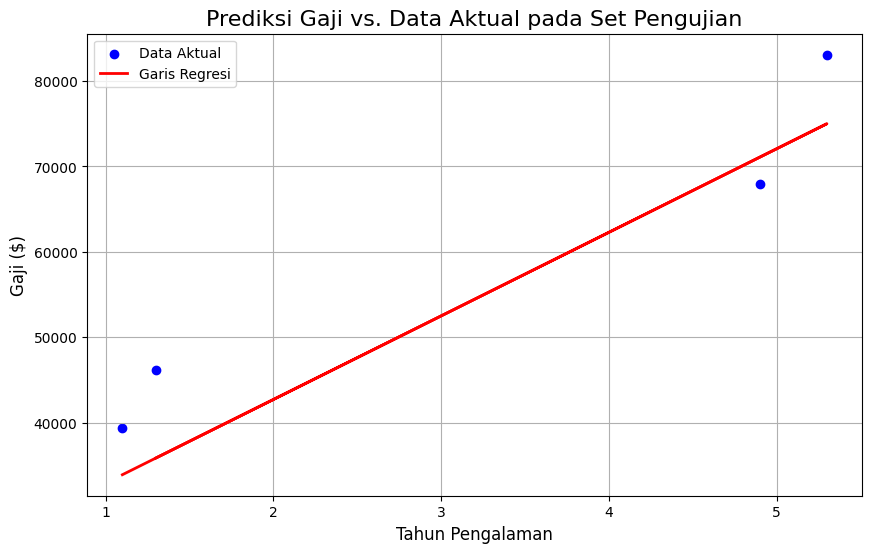

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, Y_test, color='blue', label='Data Aktual')
plt.plot(X_test, Y_pred, color='red', label='Garis Regresi', linewidth=2)

plt.title('Prediksi Gaji vs. Data Aktual pada Set Pengujian', fontsize=16)
plt.xlabel('Tahun Pengalaman', fontsize=12)
plt.ylabel('Gaji ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()